In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('calendar.csv') #reads in the calendar data set
df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [139]:
drop_missing  = df.dropna() #cleans data by removing missing values 

In [140]:
drop_missing #displays drop_missing to make sure missing values were dropped properly

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [141]:
drop_missing.head() #head of drop_missing

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [142]:
encode_df = drop_missing #create a new dataframe to work with encoding t as 1
encode_df.head()
type(encode_df)

pandas.core.frame.DataFrame

In [143]:
encode_df.replace(['t'], [1], inplace = True) #replaces t with 1

/Users/sethhamilton/ml/my_env/lib/python3.7/site-packages/pandas/core/frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [144]:
encode_df #displays encode_df

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
9,241032,2016-01-13,1,$85.00
10,241032,2016-01-14,1,$85.00
14,241032,2016-01-18,1,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,1,$87.00
1393208,10208623,2016-01-07,1,$87.00
1393211,10208623,2016-01-10,1,$87.00
1393212,10208623,2016-01-11,1,$87.00


In [145]:
encode_df.head() #head of encode_df

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
9,241032,2016-01-13,1,$85.00
10,241032,2016-01-14,1,$85.00
14,241032,2016-01-18,1,$85.00


In [146]:
encode_df['year'] = pd.DatetimeIndex(encode_df['date']).year #strips year and month only from the date column
encode_df['month'] = pd.DatetimeIndex(encode_df['date']).month
encode_df.head()

/Users/sethhamilton/ml/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sethhamilton/ml/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,listing_id,date,available,price,year,month
0,241032,2016-01-04,1,$85.00,2016,1
1,241032,2016-01-05,1,$85.00,2016,1
9,241032,2016-01-13,1,$85.00,2016,1
10,241032,2016-01-14,1,$85.00,2016,1
14,241032,2016-01-18,1,$85.00,2016,1


In [147]:
encode_df = encode_df.drop(columns=['listing_id', 'date', 'available']) #removes the old date column, listing_id column, and available column
def remove_dollar_signs(dollar): #gets rid of $ to make data more easy to manage
    if isinstance(dollar, str):
        return(dollar.replace('$', '').replace(',', ''))
    return(dollar)
encode_df['price'] = encode_df['price'].apply(remove_dollar_signs).astype('float') # applies remove_dollar_signs to encode_df

In [148]:
encode_df.head() #displays encode_df

,price,year,month
0,85.0,2016,1
1,85.0,2016,1
9,85.0,2016,1
10,85.0,2016,1
14,85.0,2016,1


In [149]:
def linear_model(encode_df, test_size=.3, rand_state=42): #function to split explanatory and response variables, split test/train, and predict price of home
    
    X = encode_df.drop(['price'], axis=1)
    y = encode_df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
        
    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    y_train_preds = lm_model.predict(X_train)
    "The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = linear_model(encode_df, 'price')

In [150]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.0018192092714783836.  The rsquared on the test data was 0.0016600789372677172.


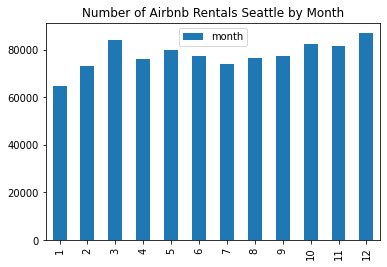

In [151]:
month_count = encode_df.month.value_counts()
encode_df_plot = pd.DataFrame(month_count, index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
encode_df_plot.plot(kind="bar")
plt.title("Number of Airbnb Rentals Seattle by Month");

In [152]:
profit = encode_df.month.value_counts()

In [153]:
profit

12    87061
3     83938
10    82438
11    81780
5     79971
9     77246
6     77244
8     76347
4     76037
7     74222
2     73321
1     64937
Name: month, dtype: int64